In [1]:
# imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
import seaborn as sns
import wrangle as w
import get_compare as gc

### Copy of Data Dictionary
**_STATE** - State FIPS Code\
**PHYSHLTH** - Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good?\
**MENTHLTH** - Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good?\
**CHECKUP1** - About how long has it been since you last visited a doctor for a routine checkup?\
**EXERANY2** - During the past month, other than your regular job, did you participate in any physical activities or exercises such as running, calisthenics, golf, gardening, or walking for exercise?\
**SLEPTIM1** - On average, how many hours of sleep do you get in a 24-hour period?\
**RMVTETH4** - Not including teeth lost for injury or orthodontics, how many of your permanent teeth have been removed because of tooth decay or gum disease?\
**CVDINFR4** - (Ever told) you had a heart attack, also called a myocardial infarction?\
**CVDCRHD4** - (Ever told) (you had) angina or coronary heart disease?
**CVDSTRK3** - (Ever told) (you had) a stroke.\
**ASTHMA3** - (Ever told) (you had) asthma?\
**CHCSCNC1** - (Ever told) (you had) skin cancer that is not melanoma?\
CHCCOPD3 - (Ever told) (you had) C.O.P.D. (chronic obstructive pulmonary disease), emphysema or chronic bronchitis?\
**ADDEPEV3** - (Ever told) (you had) a depressive disorder (including depression, major depression, dysthymia, or minor depression)?\
**CHCKDNY2** - Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?\
**HAVARTH4** - (Ever told) (you had) some form of arthritis, rheumatoid arthritis, gout, lupus, or fibromyalgia?  (Arthritis diagnoses include: rheumatism, polymyalgia rheumatica; osteoarthritis (not osteporosis); tendonitis, bursitis, bunion, tennis elbow; carpal tunnel syndrome, tarsal tunnel syndrome; joint infection, etc.)\
**DIABETE4** - (Ever told) (you had) diabetes?
**DEAF** - Are you deaf or do you have serious difficulty hearing?\
**BLIND** - Are you blind or do you have serious difficulty seeing, even when wearing glasses?\
**DECIDE** - Because of a physical, mental, or emotional condition, do you have serious difficulty concentrating, remembering, or making decisions?\
**DIFFWALK** - Do you have serious difficulty walking or climbing stairs?\
**DIFFDRES** - Do you have difficulty dressing or bathing?\
**DIFFALON** - Because of a physical, mental, or emotional condition, do you have difficulty doing errands alone such as visiting a doctor´s office or shopping?\
**_SMOKER3** - Four-level smoker status:  Everyday smoker, Someday smoker, Former smoker, Non-smoker\
**ECIGNOW2** - Would you say you have never used e-cigarettes or other electronic vaping products in your entire life or now use them every day, use them some days, or used them in the past but do not currently use them at all?\
**LCSCTSC1** - Have you ever had a CT or CAT scan of your chest area?\
**_RACEGR4** - Five-level race/ethnicity category\
**_AGEG5YR** - Fourteen-level age category\
**HTM4** - Reported height in meters\
**WTKG3** - Reported weight in kilograms\
**_BMI5** - Body Mass Index (BMI)\
**DRNKANY6** - Adults who reported having had at least one drink of alcohol in the past 30 days.\
**_AIDTST4** - Adults who have ever been tested for HIV\
**FLUSHOT7** - During the past 12 months, have you had either flu vaccine that was sprayed in your nose or flu shot injected into your arm?\
**PNEUVAC4** - Have you ever had a pneumonia shot also known as a pneumococcal vaccine?\
**TETANUS1** - Have you received a tetanus shot in the past 10 years? Was this Tdap, the tetanus shot that also has pertussis or whooping cough vaccine?\
**HIVRISK5** - You have injected any drug other than those prescribed for you in the past year. You have been treated for a sexually transmitted disease or STD in the past year. You have given or received money or drugs in exchange for sex in the past year.\
**COVIDPOS** - Has a doctor, nurse, or other health professional ever told you that you tested positive for COVID 19\

# Acquire

* Data has been acquired from Kaggle at https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease
* The data set contained 445,132 observations and 40 features before cleaning
* Each observation represents one person in the study
* Each feature represents an aspect of each person that may be health related

In [2]:
df = pd.read_csv('heart_2022.csv')

# Prepare

* Droped columns that were poor predictors of heart attack 
* Dropped rows with null values ~(70,000 rows)
* ~375,000 rows ramain after dropping the null values
* Data was split into train, validate, and test data sets ~(64%/16%/20%)

In [3]:
df = df[['GeneralHealth',
         'PhysicalHealthDays',
         'PhysicalActivities',
         'DeafOrHardOfHearing',
         'BlindOrVisionDifficulty',
         'DifficultyWalking',
         'DifficultyDressingBathing',
         'DifficultyErrands',
         'HadAngina',
         'HadStroke',
         'HadCOPD',
         'HadKidneyDisease',
         'FluVaxLast12',
         'HadHeartAttack']]

df = df.dropna()

train, validate, test = w.split_my_data(df)

df.shape

(375029, 14)

# Explore

## Intrinsic Variables early looks
* Biological sex and ethnicity are weak predictors of HeartAttack
* Age Category has a strong relationship with having had a heart attack, however because we cannot infer the age at which the patient had a heart attack, if they did, we cannot rely on AgeCategory as a predictor of HeartAttack
* Height is not a predictor of having had a heart attack


## Physical Health

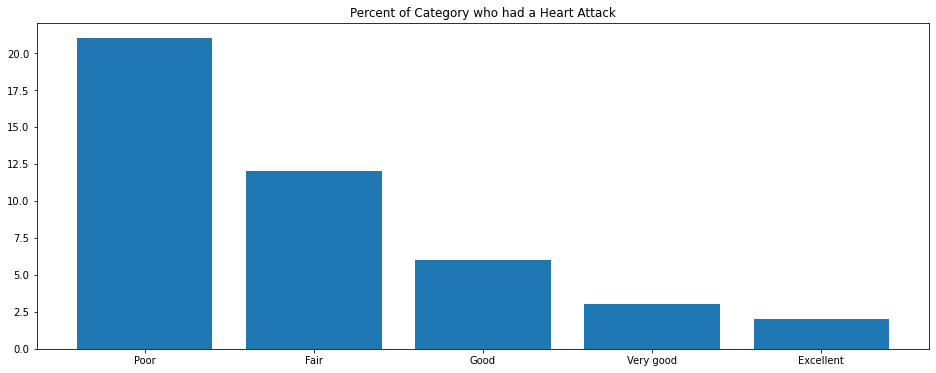

In [5]:
gc.get_chart(train, 'GeneralHealth', 'HadHeartAttack', 'Yes', 'Percent of Category who had a Heart Attack')

* Respondents reporting higher levels of general health are less likely to have experienced a heart attack

### Location
State

### Demographics
Sex\
RaceEthnicityCategory\
AgeCategory\
HeightInMeters

### Health Related questions
GeneralHealth\
PhysicalHealthDays\
MentalHealthDays\
PhysicalActivities\
HIVTesting

### Smoking an Alchohol
SmokerStatus\
ECigaretteUsage\
AlcoholDrinkers

### Welness Questions
SleepHours\
RemovedTeeth

### Sight or Hearing
DeafOrHardOfHearing\
BlindOrVisionDifficulty

### Difficulty
DifficultyConcentrating\
DifficultyWalking\
DifficultyDressingBathing\
DifficultyErrands

### Weight Related
WeightInKilograms\
BMI

### Previous Illness
HadHeartAttack\
HadAngina\
HadStroke\
HadAsthma\
HadSkinCancer\
HadCOPD\
HadDepressiveDisorder\
HadKidneyDisease\
HadArthritis\
HadDiabetes

### Vaccination
FluVaxLast12\
PneumoVaxEver\
TetanusLast10Tdap\
HighRiskLastYear\
CovidPos

### Doctor Visits
LastCheckupTime

continuous columns: ['PhysicalHealthDays']

categorical columns: ['GeneralHealth', 'PhysicalActivities', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty', 'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands', 'HadAngina', 'HadStroke', 'HadCOPD', 'HadKidneyDisease', 'FluVaxLast12']

other columns: ['HadHeartAttack']

******************************************************************************
GeneralHealth Good Number matching target vale: 4278 Tota: 77214
GeneralHealth Poor Number matching target vale: 2021 Tota: 9513
GeneralHealth Very good Number matching target vale: 2219 Tota: 83222
GeneralHealth Excellent Number matching target vale: 612 Tota: 39386
GeneralHealth Fair Number matching target vale: 3533 Tota: 30683


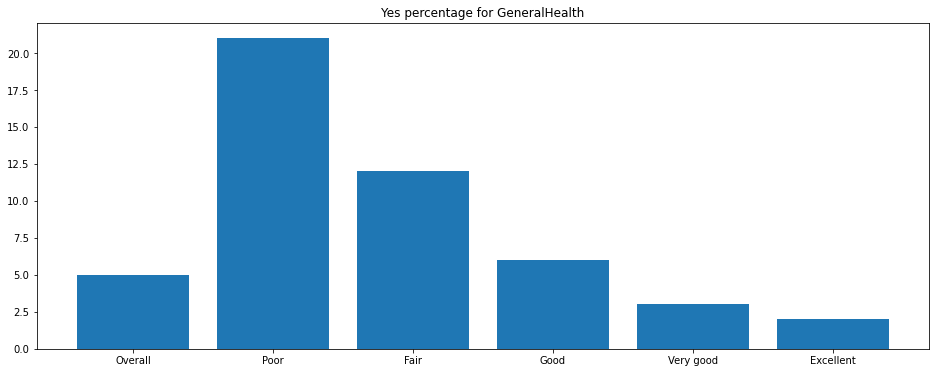

******************************************************************************
PhysicalActivities Yes Number matching target vale: 7897 Tota: 184895
PhysicalActivities No Number matching target vale: 4766 Tota: 55123


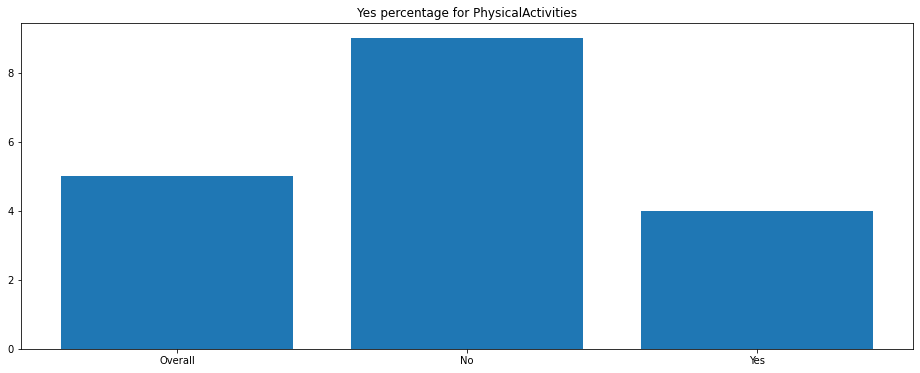

******************************************************************************
DeafOrHardOfHearing Yes Number matching target vale: 2633 Tota: 20896
DeafOrHardOfHearing No Number matching target vale: 10030 Tota: 219122


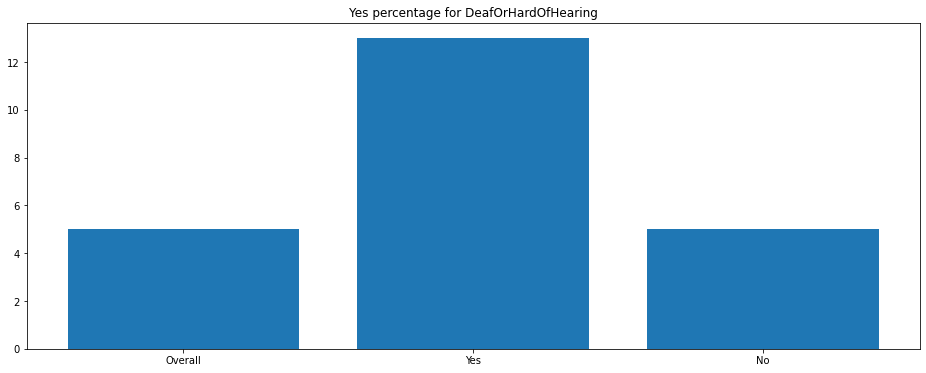

******************************************************************************
BlindOrVisionDifficulty Yes Number matching target vale: 1549 Tota: 12365
BlindOrVisionDifficulty No Number matching target vale: 11114 Tota: 227653


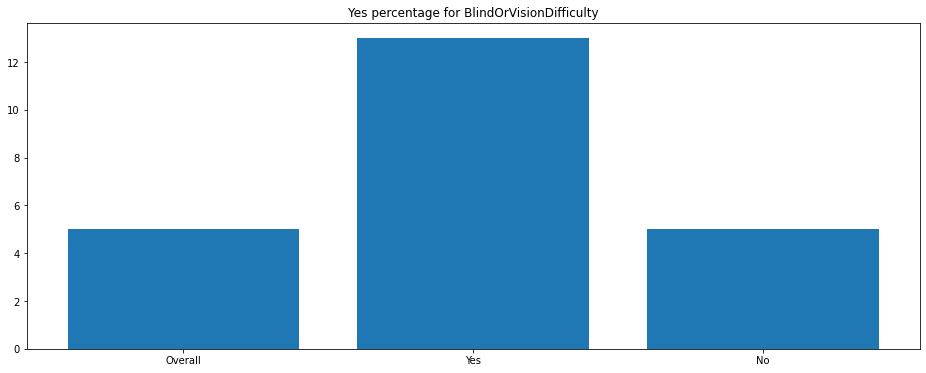

******************************************************************************
DifficultyWalking Yes Number matching target vale: 5011 Tota: 36054
DifficultyWalking No Number matching target vale: 7652 Tota: 203964


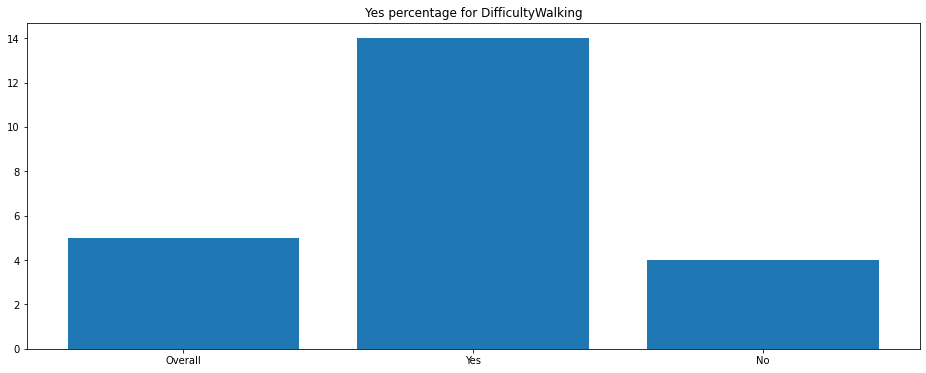

******************************************************************************
DifficultyDressingBathing Yes Number matching target vale: 1312 Tota: 8638
DifficultyDressingBathing No Number matching target vale: 11351 Tota: 231380


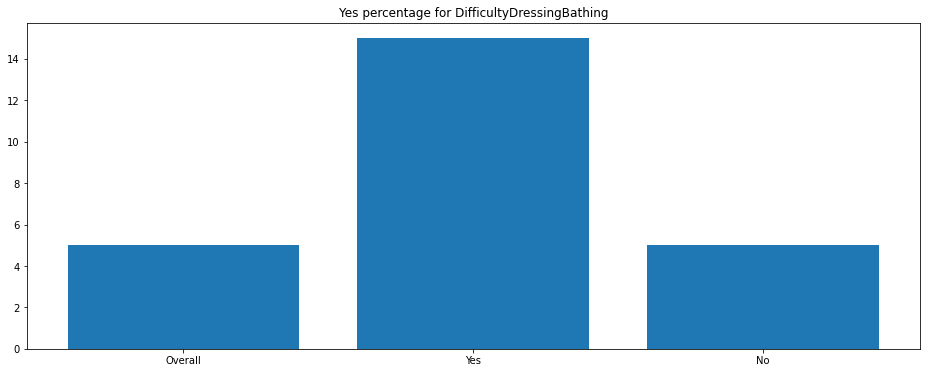

******************************************************************************
DifficultyErrands Yes Number matching target vale: 2147 Tota: 17122
DifficultyErrands No Number matching target vale: 10516 Tota: 222896


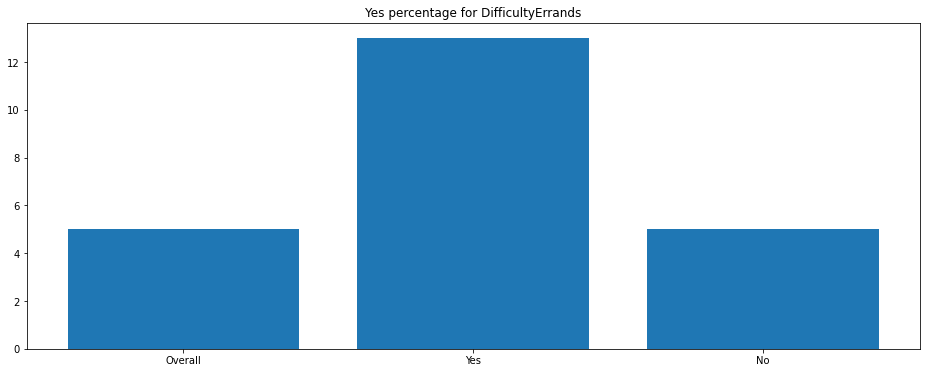

******************************************************************************
HadAngina Yes Number matching target vale: 6337 Tota: 14058
HadAngina No Number matching target vale: 6326 Tota: 225960


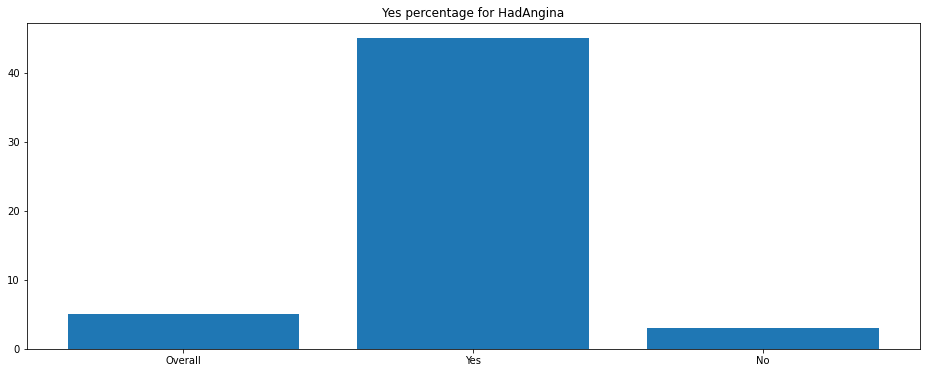

******************************************************************************
HadStroke Yes Number matching target vale: 2426 Tota: 9688
HadStroke No Number matching target vale: 10237 Tota: 230330


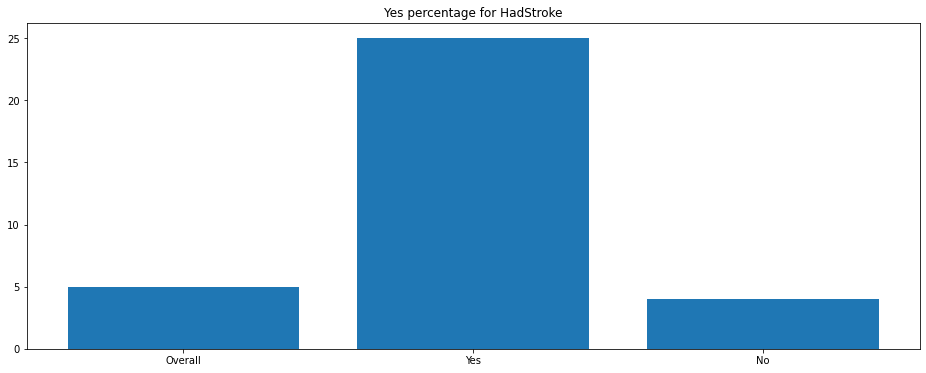

******************************************************************************
HadCOPD Yes Number matching target vale: 2875 Tota: 18380
HadCOPD No Number matching target vale: 9788 Tota: 221638


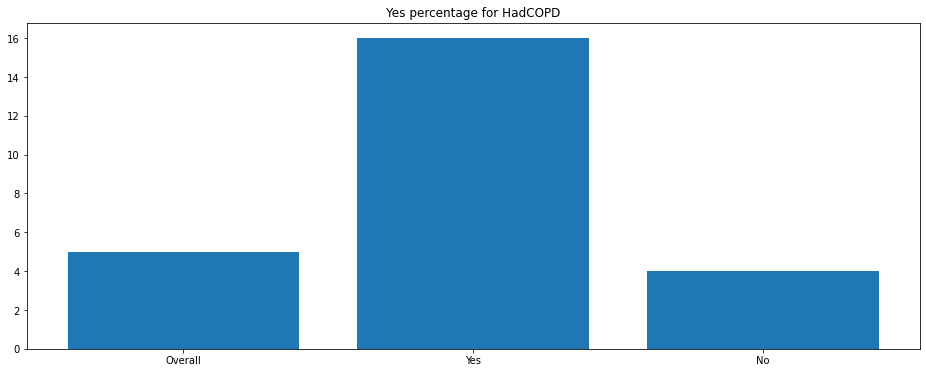

******************************************************************************
HadKidneyDisease Yes Number matching target vale: 1825 Tota: 10512
HadKidneyDisease No Number matching target vale: 10838 Tota: 229506


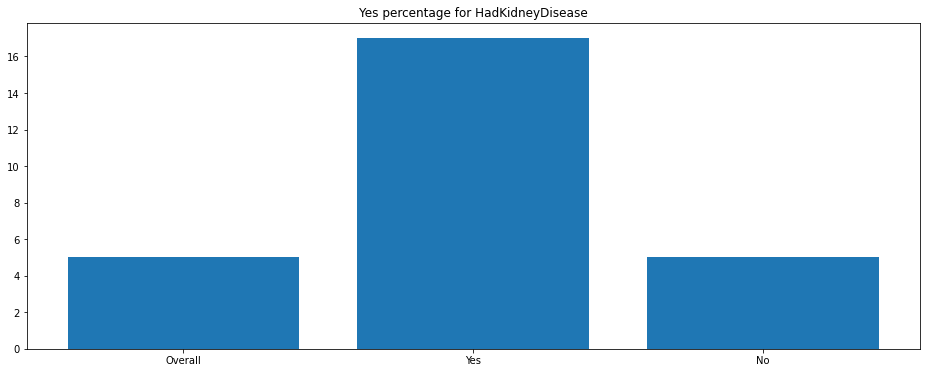

******************************************************************************
FluVaxLast12 Yes Number matching target vale: 7911 Tota: 126220
FluVaxLast12 No Number matching target vale: 4752 Tota: 113798


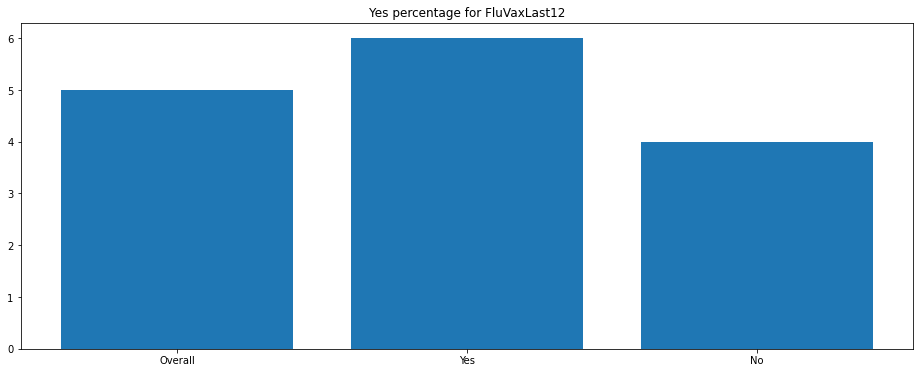

******************************************************************************


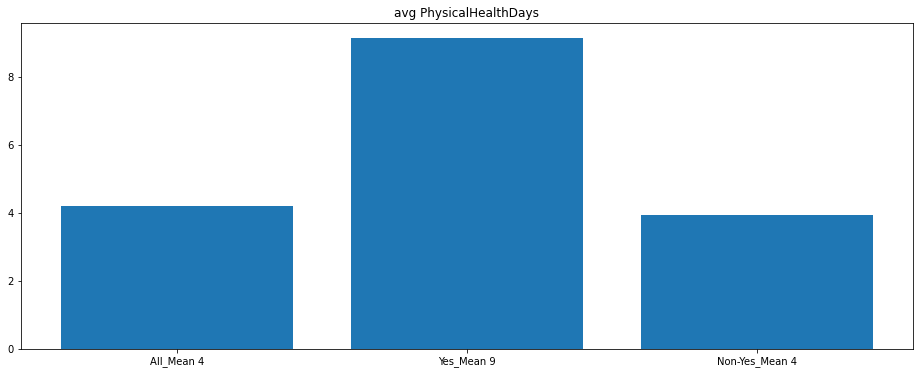

******************************************************************************


In [6]:
gc.main(train, "HadHeartAttack", "Yes")

In [7]:
print(df.GeneralHealth.value_counts())

Very good    129994
Good         120205
Excellent     61840
Fair          47987
Poor          15003
Name: GeneralHealth, dtype: int64


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375029 entries, 0 to 445131
Data columns (total 14 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   GeneralHealth              375029 non-null  object 
 1   PhysicalHealthDays         375029 non-null  float64
 2   PhysicalActivities         375029 non-null  object 
 3   DeafOrHardOfHearing        375029 non-null  object 
 4   BlindOrVisionDifficulty    375029 non-null  object 
 5   DifficultyWalking          375029 non-null  object 
 6   DifficultyDressingBathing  375029 non-null  object 
 7   DifficultyErrands          375029 non-null  object 
 8   HadAngina                  375029 non-null  object 
 9   HadStroke                  375029 non-null  object 
 10  HadCOPD                    375029 non-null  object 
 11  HadKidneyDisease           375029 non-null  object 
 12  FluVaxLast12               375029 non-null  object 
 13  HadHeartAttack             37

In [9]:
print(df.HighRiskLastYear.value_counts())

AttributeError: 'DataFrame' object has no attribute 'HighRiskLastYear'

In [ ]:
for col in df.columns:

    print(col)

In [ ]:
df.HadKidneyDisease.value_counts()

In [ ]:
df.HadStroke.value_counts()

In [ ]:
train, validate, test = w.get_my_data()

# Prepare

* There were no null values in this data set
* Features were renamed for convention and readability
* Dummy variables were created for catagorical features for use in modeling
* Data was split into train, validate, and test dataframes stratifying on heart disease ~(64/16/20)
* Scaled versions of numeric variables were added to the dataframe for use in modeling

In [ ]:
train.bmi_cat.value_counts()

In [ ]:
num_cols = ['bmi',
            'poor_physical_health_days',
            'poor_mental_health_days',
            'sleep_hours']


cat_cols = ['heart_disease',
            'smoker',
            'heavy_drinker',
            'difficulty_walking',
            'diabetic',
            'physical_activity',
            'kidney_disease',
            'skin_cancer',
            'age_category',
            'general_health',
            'stroke',
            'sex',
            'race',
            'asthma',
            'bmi_cat']

In [ ]:
for col in num_cols:
    
    over = train[col].mean()
    heart = train[col][train.heart_disease == 'Yes'].mean()
    health = train[col][train.heart_disease == 'No'].mean()
    
    x = ['Overall', 'Heart-attack', 'Non-heart-attack']
    hight = [over, heart, health]
    
    plt.bar(x, hight)
    plt.title(f'avg {col}')
    plt.show()

In [ ]:


for col in cat_cols:

    vals = list(set(train[col].to_list()))
    hights = []

    for val in vals:
        
        num_val_heart = len(train[(train[col] == val) & (train['heart_disease'] == "Yes")])
        num_val = len(train[train[col] == val])

        print(col, val, num_val_heart, num_val)
        per_heart = round((num_val_heart/num_val),2)*100
        
        hights.append(per_heart)
        
    plt.bar(vals, hights)
    plt.title(f'heart attack percentage for {col}')
    plt.show()

In [ ]:
    vals = list(set(train[col].to_list()))
    hights = []

    for val in vals:

        heart_per = int(round(len(train[(train['bmi_cat'] == val) & (train['heart_disease'] == "Yes")])/len(train[(train[col] == val)]),2)*100)
        
        hights.append(heart_per)
        
    plt.bar(vals, hights)
    plt.title(f'heart attack percentage for {col}')
    plt.show()

In [ ]:
0/12

In [ ]:
import pandas as pd
import re

# Sample DataFrame with columns containing numbers
data = {'col_1': [1, 2, 3], 
        'col_10': [4, 5, 6], 
        'col_2': [7, 8, 9]}
df = pd.DataFrame(data)

# Function to extract and convert numerical part from column names
def extract_number(col_name):
    match = re.search(r'\d+', col_name)
    if match:
        return int(match.group())
    return float('inf') # Handle cases where no number is found (place at the end)

# Sort columns by the numerical part of their names
sorted_df = df.sort_index(axis=1, key=lambda x: x.map(extract_number))

print(sorted_df)